<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Задача 1

Генерируйте выборки объема 𝑛 = 50 из 𝒩(0, 1) (первую) и 𝒩(0,1) (вторую). Проверьте их однородность критерием Манна–Уитни. Теперь то же для выборок из 𝒩 (0, 1) и 𝒩 (0, 1.5). Теперь то же для выборок из exp(1) (первую) и exp(1.3) (вторую).


# Задача 2

Генерируйте выборки объема 𝑛 = 50 из 𝒩(0,1) (первую) и 𝒩(0,1) (вторую). Проверьте их од- нородность критерием Баумгартнера–Вейсса–Шиндлера. Теперь то же для выборок из 𝒩(0,1) и 𝒩 (0, 1.5). Теперь то же для выборок из exp(1) (первую) и exp(1.3) (вторую).

# Задача 3

Генерируйте выборки объема 𝑛 = 50 из 𝒩 (0, 1) (первую) и 𝒩 (0, 1) (вторую). Проверьте их однород- ность критерием Колмогорова–Смирнова. Теперь то же для выборок из 𝒩 (0, 1) и 𝒩 (0, 1.5). Теперь то же для выборок из exp(1) (первую) и exp(1.3) (вторую).
2) (вторую).

# Задача 4

Генерируйте пять выборок из 𝑅[−0.5, 0.5] объема 100. Исследуйте их на равенство средних методом Краскера–Уоллиса. Проделайте то же для пяти выборок, где первые четыре из 𝑅[−0.5, 0.5], а пятая из 𝑅[0, 1]. Теперь для пяти выборок из 𝑅[−0.5 + 𝑖/10, 0.5 + 𝑖/10], 𝑖 = 1, ..., 5. И наконец, для пяти выборок, где первые четыре из 𝑅[−0.5, 0.5], а пятая из 𝑅[−0.5, 1.5].

# Задача 5

В файле nzrivers.txt есть информация о длинах новозеландских рек, впадающих в Тихий океан или Тасманово море. Какие из рек в среднем короче? Посмотрите на карту и сделайте предположение почему.

# Задача 6

В файле iris.txt приведены показатели трех видов растений. Можем ли мы утверждать, что у всех видов а) одинаковые многомерные распределения б) одинаковые средние. Сравнить виды попарно.

# Задача 7

В файле poison.txt приведены результаты о длительности жизни животных после принятия одного из нескольких ядов и одного из нескольких препаратов. Можем ли мы утверждать, что 
* а) яды одинаково эффективны 
* б) препараты одинаково эффективны 
* в) каждый из препаратов оди- наково работает против любого из ядов. 

Данные считать близкими к нормальным из физических соображений.


In [1]:
import pandas as pd
import csv
import numpy as np
import math
import sympy
from sympy import *
import scipy.stats as st

from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import cramervonmises
from scipy.stats import anderson

from matplotlib import pyplot as plt
import statsmodels.api as sm

from scipy.stats import laplace
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import standard_t as student

from hyppo.ksample import KSample

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings("ignore")

# Задача 1

Генерируйте выборки объема 𝑛 = 50 из 𝒩(0, 1) (первую) и 𝒩(0,1) (вторую). Проверьте их однородность критерием Манна–Уитни. 

Теперь то же для выборок из 𝒩 (0, 1) и 𝒩 (0, 1.5). 

Теперь то же для выборок из exp(1) (первую) и exp(1.3) (вторую).

1) N(0,1), N(0,1)

In [2]:
def MW(sample1, sample2): 
    p_value = st.mannwhitneyu(sample1, sample2).pvalue

    if p_value < alpha: 
        string = H1 
    else: 
        string = H0
    print('p_value:', p_value)
    print(string)

In [3]:
N = 50
H0 = 'Не можем отвергнуть H0, выборки однородные'
H1 = 'Отвергаем H0, выборки неоднородные'
alpha = 0.05

samples = {1: [], 2: []}
samples[1] = np.random.normal(0,1, size=N)
samples[2] = np.random.normal(0,1, size=N)

MW(samples[1], samples[2])

p_value: 0.55557849072207
Не можем отвергнуть H0, выборки однородные


2) 𝒩 (0, 1) и 𝒩 (0, 1.5)

In [4]:
samples[1] = np.random.normal(0,1, size=N)
samples[2] = np.random.normal(0,1.5, size=N)

MW(samples[1], samples[2])

p_value: 0.325917929137599
Не можем отвергнуть H0, выборки однородные


3) exp(1) и exp(1.3)

In [5]:
samples[1] = np.random.exponential(scale=1, size=N)
samples[2] = np.random.exponential(scale=1.3, size=N)

MW(samples[1], samples[2])

p_value: 0.058443889727859626
Не можем отвергнуть H0, выборки однородные


# Задача 2

Генерируйте выборки объема 𝑛 = 50 из 𝒩(0,1) (первую) и 𝒩(0,1) (вторую). Проверьте их однородность критерием Баумгартнера–Вейсса–Шиндлера. Теперь то же для выборок из 𝒩(0,1) и 𝒩 (0, 1.5). Теперь то же для выборок из exp(1) (первую) и exp(1.3) (вторую).

In [6]:
def get_B(X, Y): 
    n = len(X)
    m = len(Y)
    
    sample = np.concatenate((X,Y))
    sample.sort()
    
    X_rank = []
    Y_rank = []
    
    for item in X: 
        lst = set([(sample[i] == item)*(i+1) for i in range(len(sample))]) - {0}
        lst = np.array(list(lst))
        X_rank.append(lst.mean())
        
    for item in Y: 
        lst = set([(sample[i] == item)*(i+1) for i in range(len(sample))]) - {0}
        lst = np.array(list(lst))
        Y_rank.append(lst.mean())
        
    X_rank.sort()
    Y_rank.sort()
            
    B_x = 0
    for i in range(1, n+1): 
        B_x += ((X_rank[i-1] - (m + n)*i / n)** 2)/ (((i / (n + 1)) * (1 - i / (n + 1)) * (m * (n + m) / n)))
        
    B_x /= n   
    
    B_y = 0
    for i in range(1, m+1): 
        B_y += ((Y_rank[i-1] - (m + n)*i / m )**2) / (((i / (m + 1)) * (1 - i / (m + 1)) * (n * (n + m) / m)))
    
    B_y /= m
    
    B = (B_x + B_y) * 0.5
    return B

def get_pval_BVS(sample1, sample2, B): 
    b = get_B(sample1, sample2)
    i = np.where(abs(B - b) == min(abs(B - b)))[0][0] + 1
    pval =  1 - i / (B.shape[0] + 1)
#     print('p_value:', round(pval, 5))
#     if pval < alpha: 
#         print(H1)
#     else: 
#         print(H0)
    return pval

In [7]:
N = 50 
N_it = 1000

1) N(0,1), N(0,1)

In [8]:
# обучение на N(0,1)
B = np.array([])
for i in range(N_it): 
    sample1 = np.random.normal(0, 1, N)
    sample2 = np.random.normal(0, 1, N)
    B = np.concatenate((B, [get_B(sample1, sample2)]))
    
B.sort()


In [9]:
p_val = []
for i in range(1000): 
    sample1 = np.random.normal(0, 1, N)
    sample2 = np.random.normal(0, 1, N)
    p_val.append(get_pval_BVS(sample1, sample2, B))
    

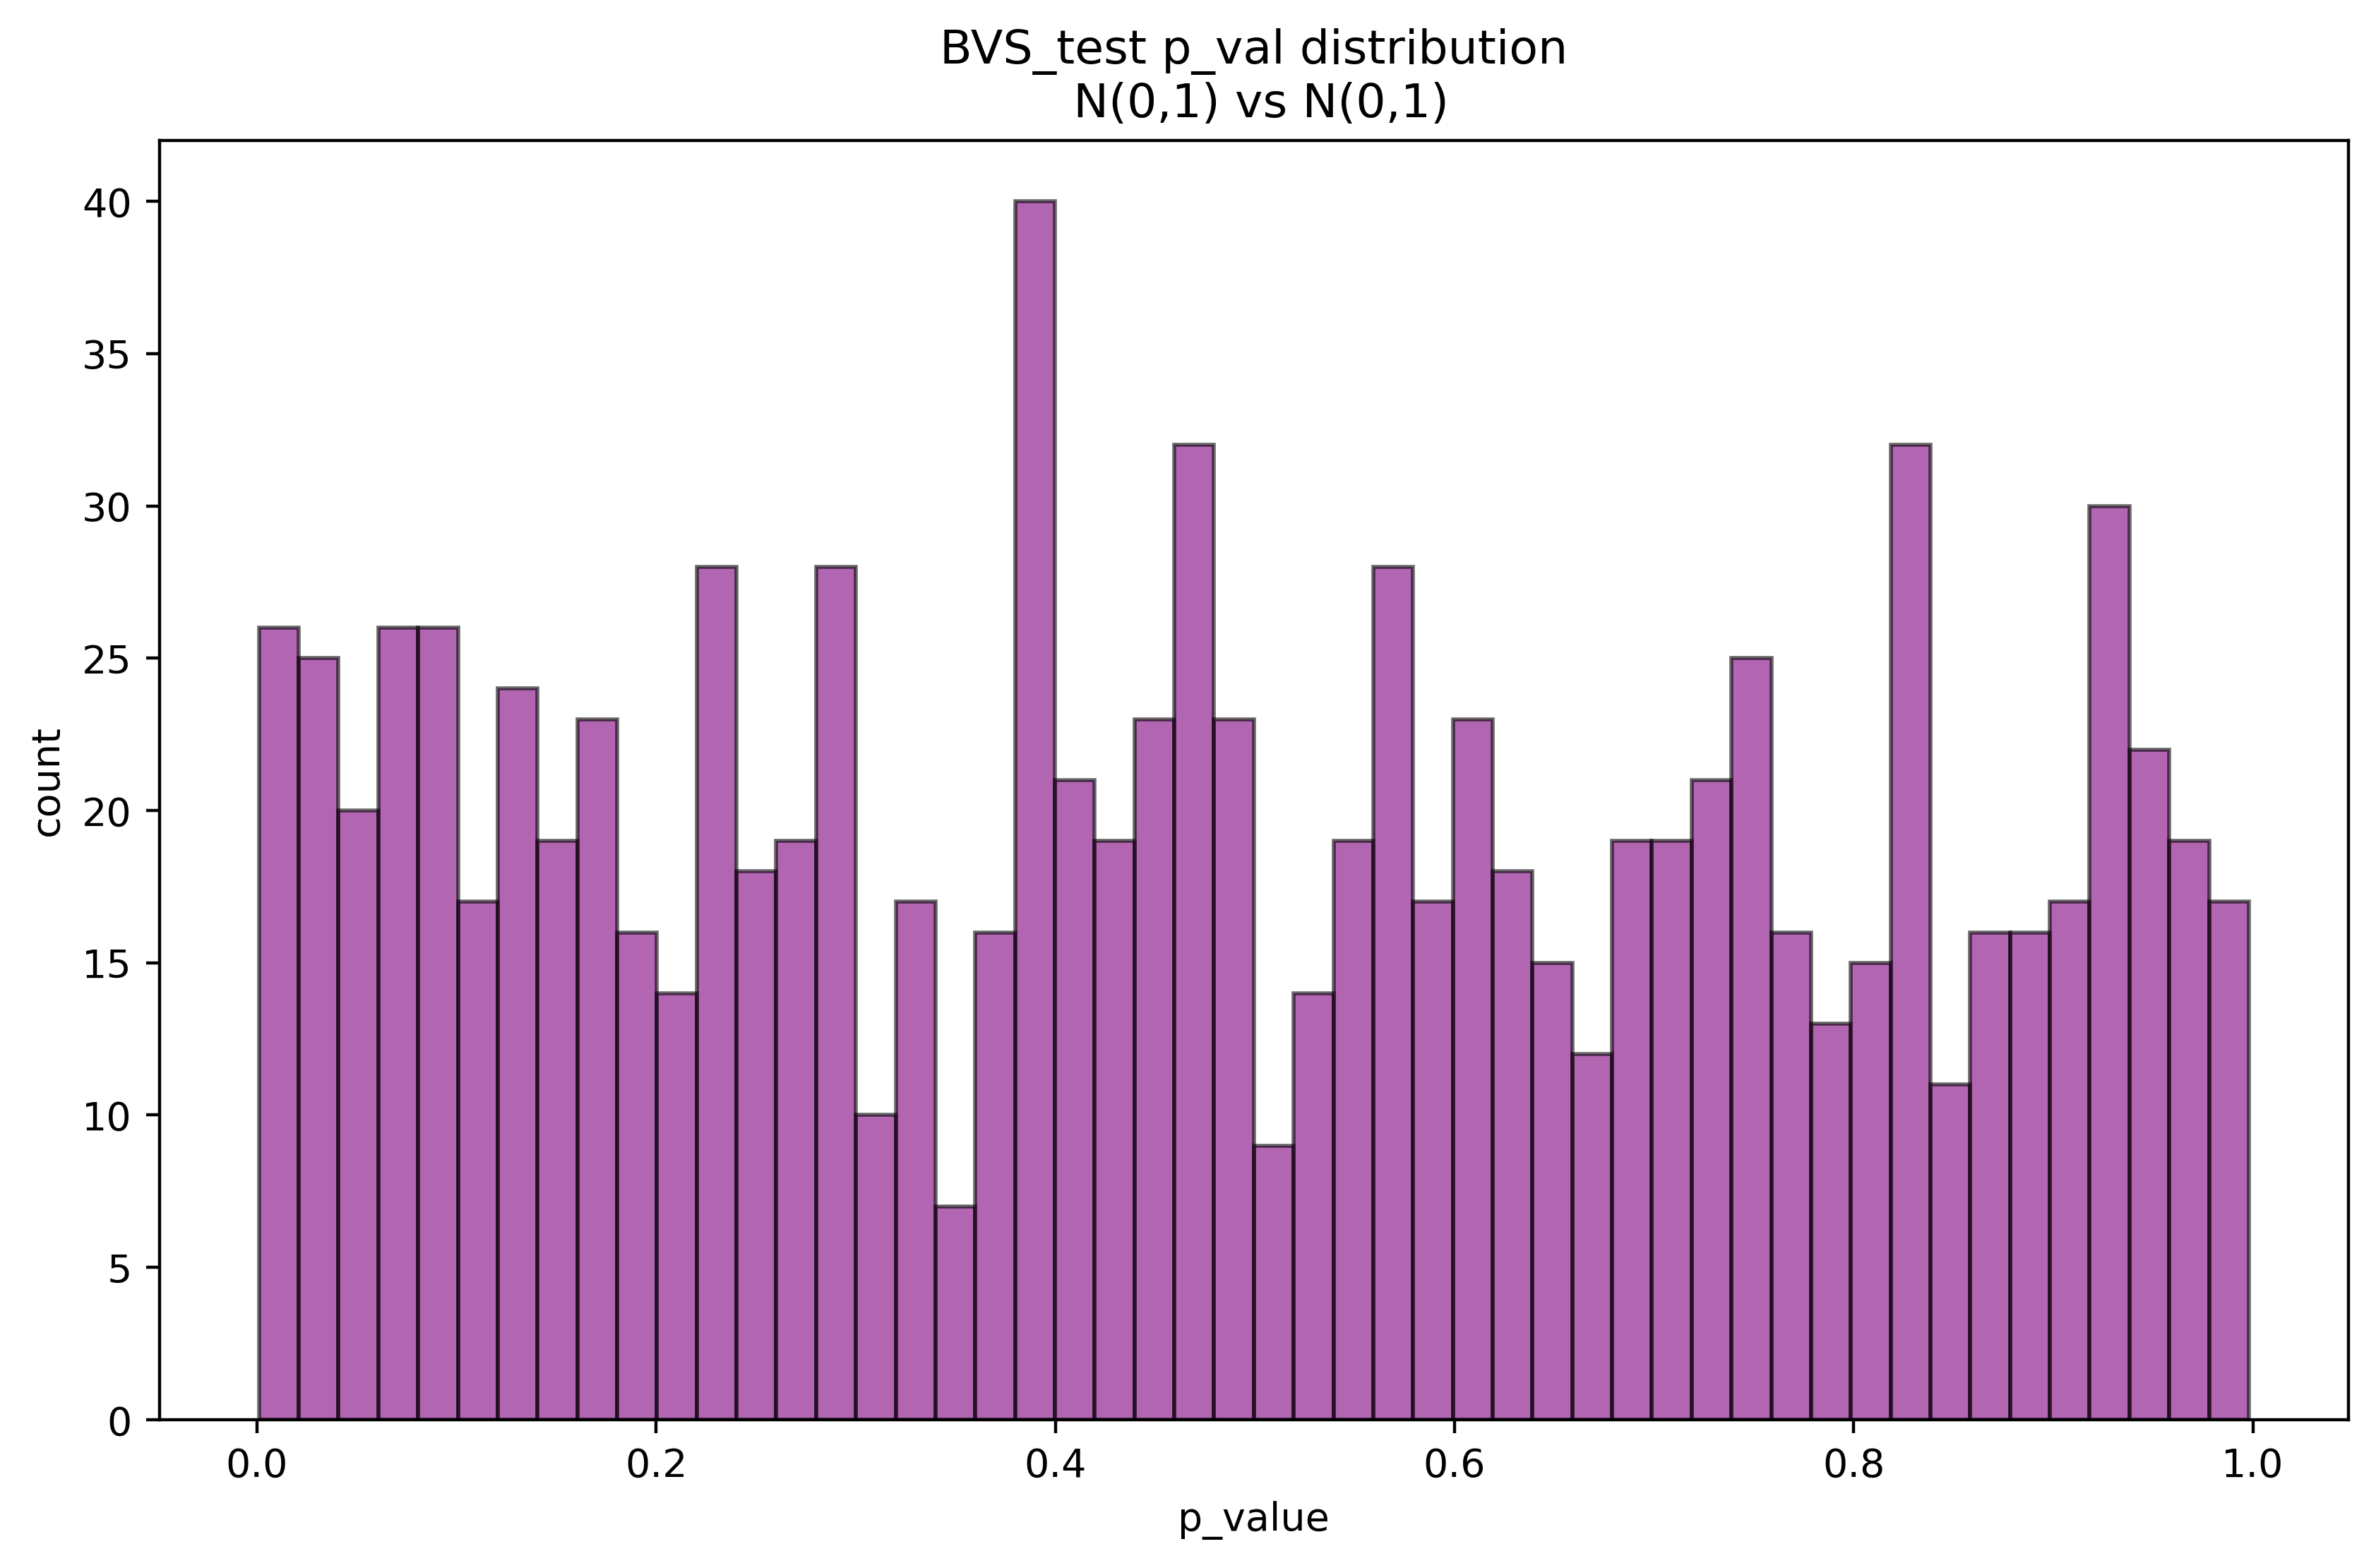

In [10]:
plt.figure(figsize=(10,6), dpi=400)
plt.hist(p_val,color='purple', alpha=0.6, edgecolor='black', bins=50);
plt.title('BVS_test p_val distribution\n N(0,1) vs N(0,1)')
plt.xlabel('p_value')
plt.ylabel('count')
plt.show()

Распределение напоминает равномерное, значит, распределения однородные

2) 𝒩(0,1) и 𝒩 (0, 1.5)

In [11]:
p_val = []
for i in range(1000): 
    sample1 = np.random.normal(0, 1, N)
    sample2 = np.random.normal(0, 1.5, N)
    p_val.append(get_pval_BVS(sample1, sample2, B))
    

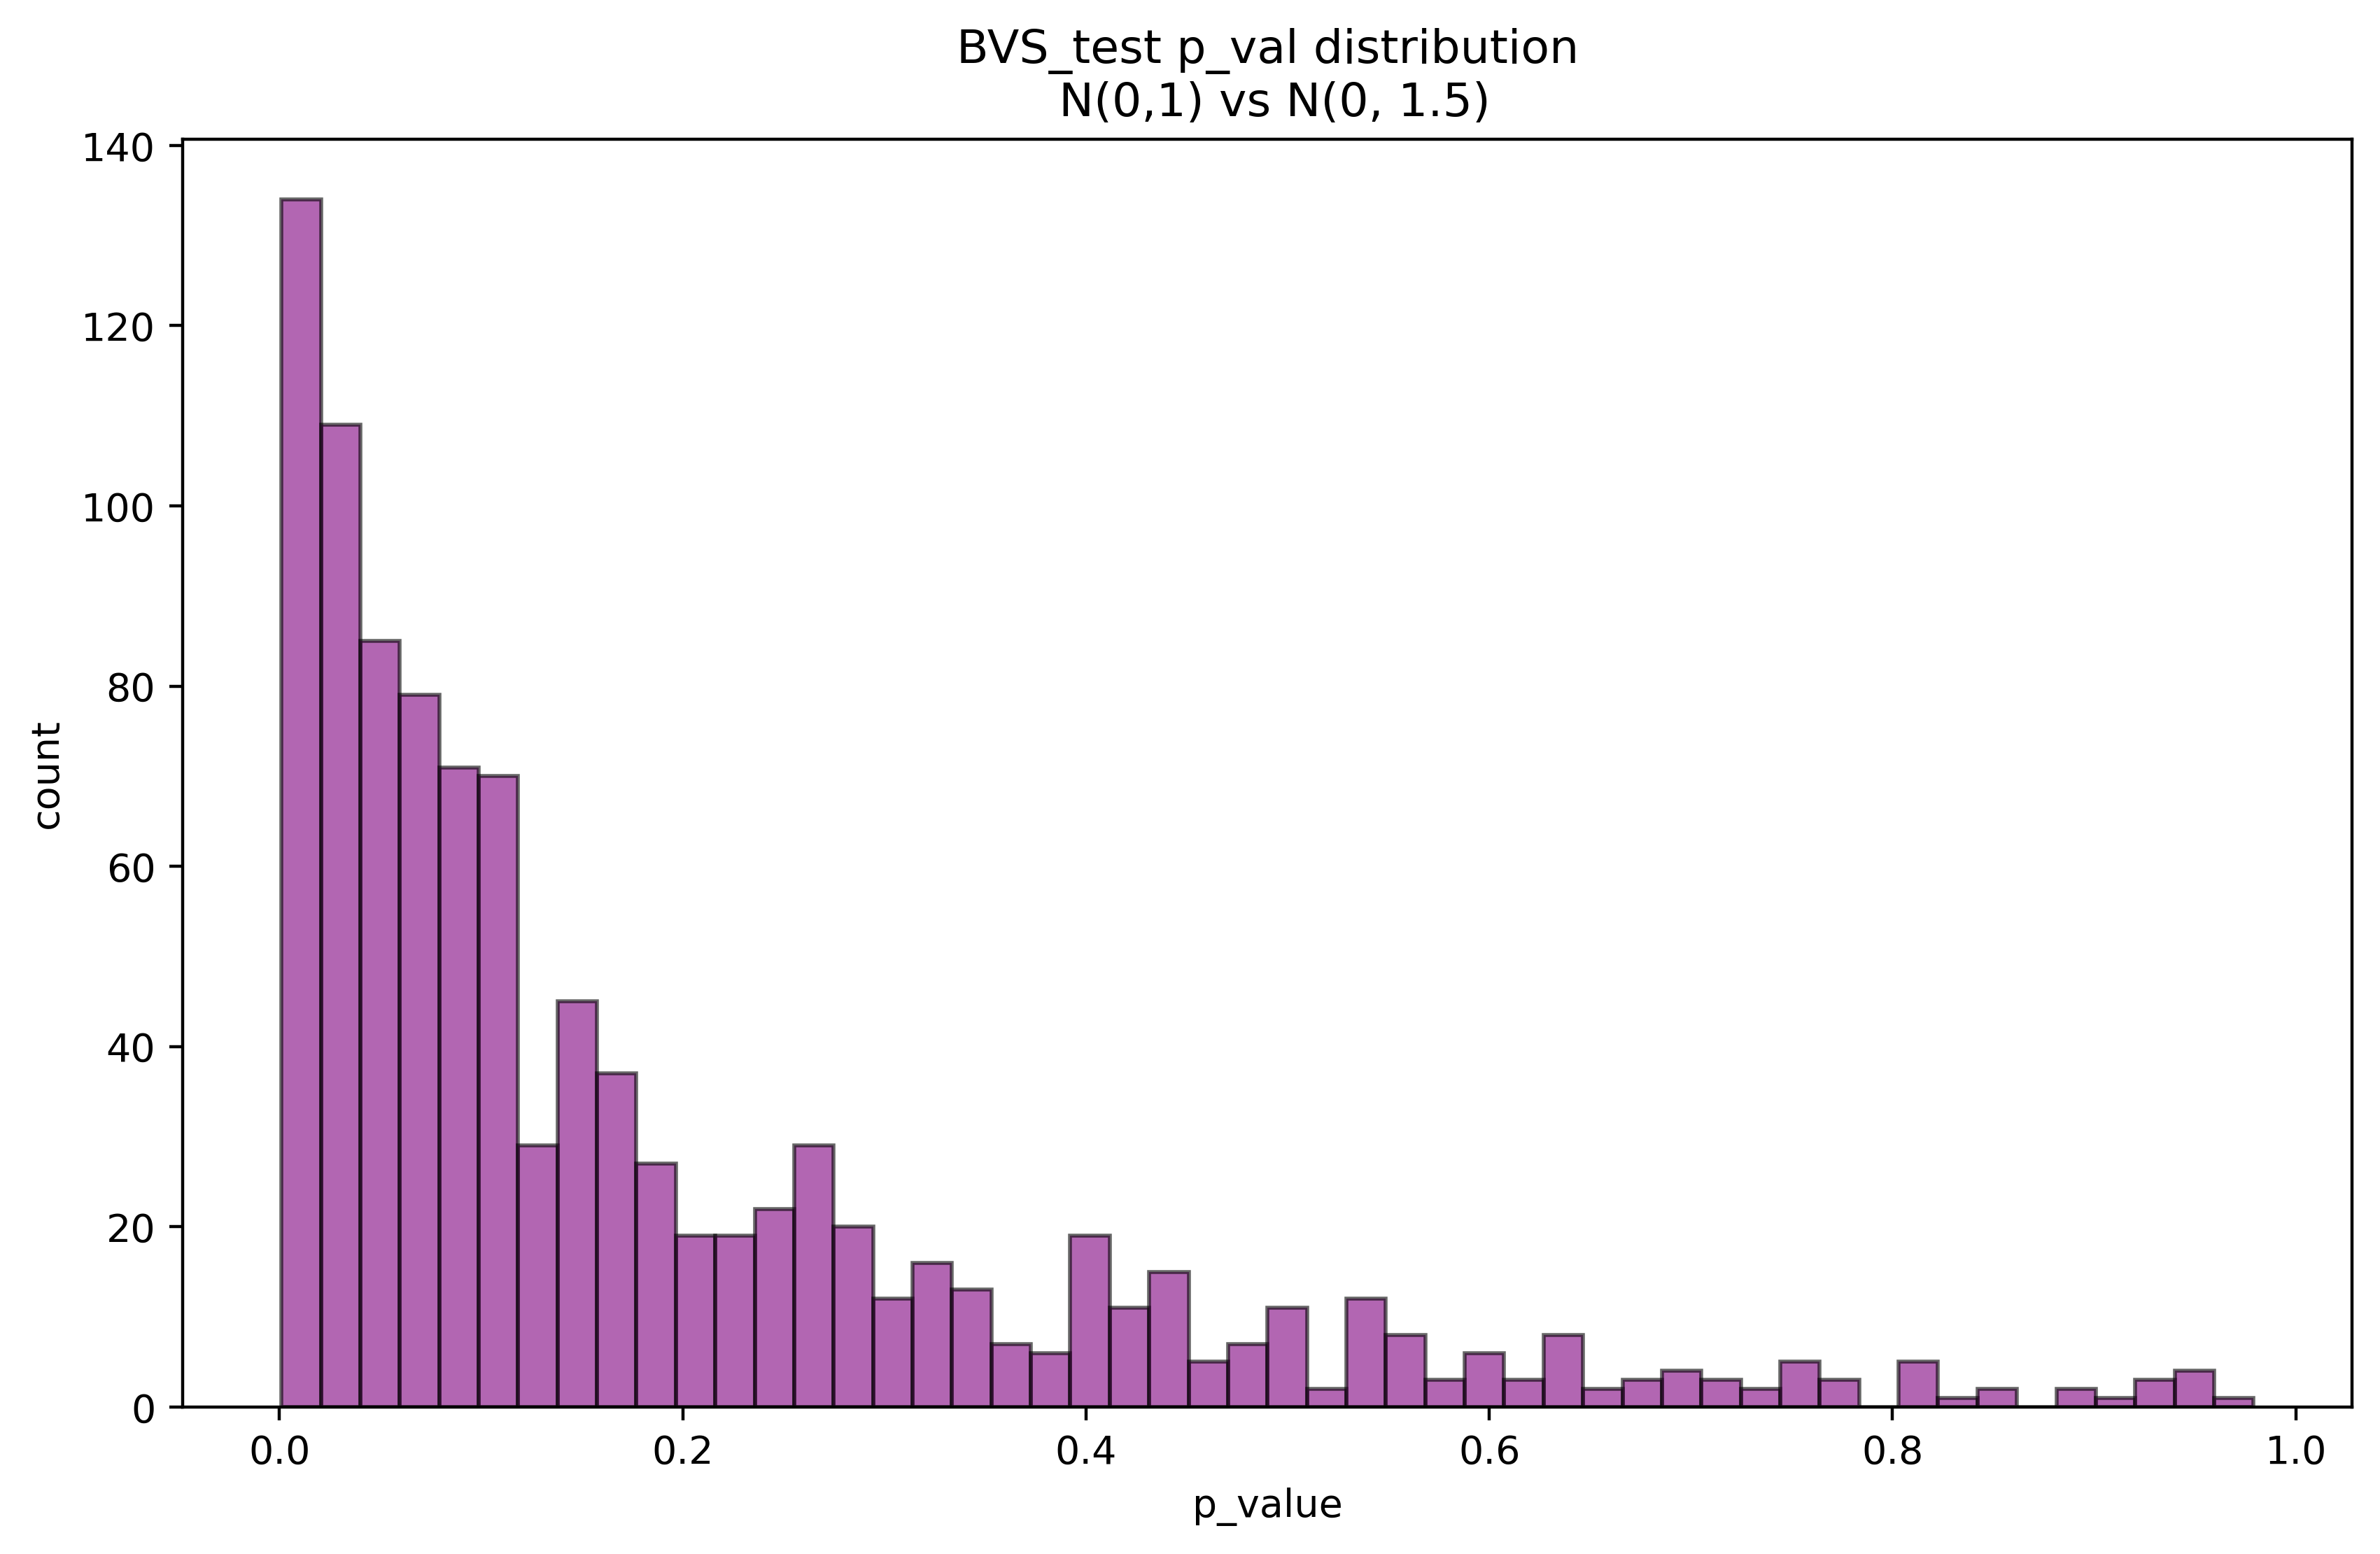

In [12]:
plt.figure(figsize=(10,6), dpi=400)
plt.hist(p_val,color='purple', alpha=0.6, edgecolor='black', bins=50);
plt.title('BVS_test p_val distribution\n N(0,1) vs N(0, 1.5)')
plt.xlabel('p_value')
plt.ylabel('count')
plt.show()

Распределение смещено влево, значит распределения неоднороны

3) exp(1) и exp(1.3)

In [13]:
# обучение на exp(1)
B = np.array([])
for i in range(N_it): 
    sample1 = np.random.exponential(1, N)
    sample2 = np.random.exponential(1, N)
    B = np.concatenate((B, [get_B(sample1, sample2)]))
    
B.sort()

In [14]:
p_val = []
for i in range(1000): 
    sample1 = np.random.exponential(1, N)
    sample2 = np.random.exponential(1.3, N)
    p_val.append(get_pval_BVS(sample1, sample2, B))
    

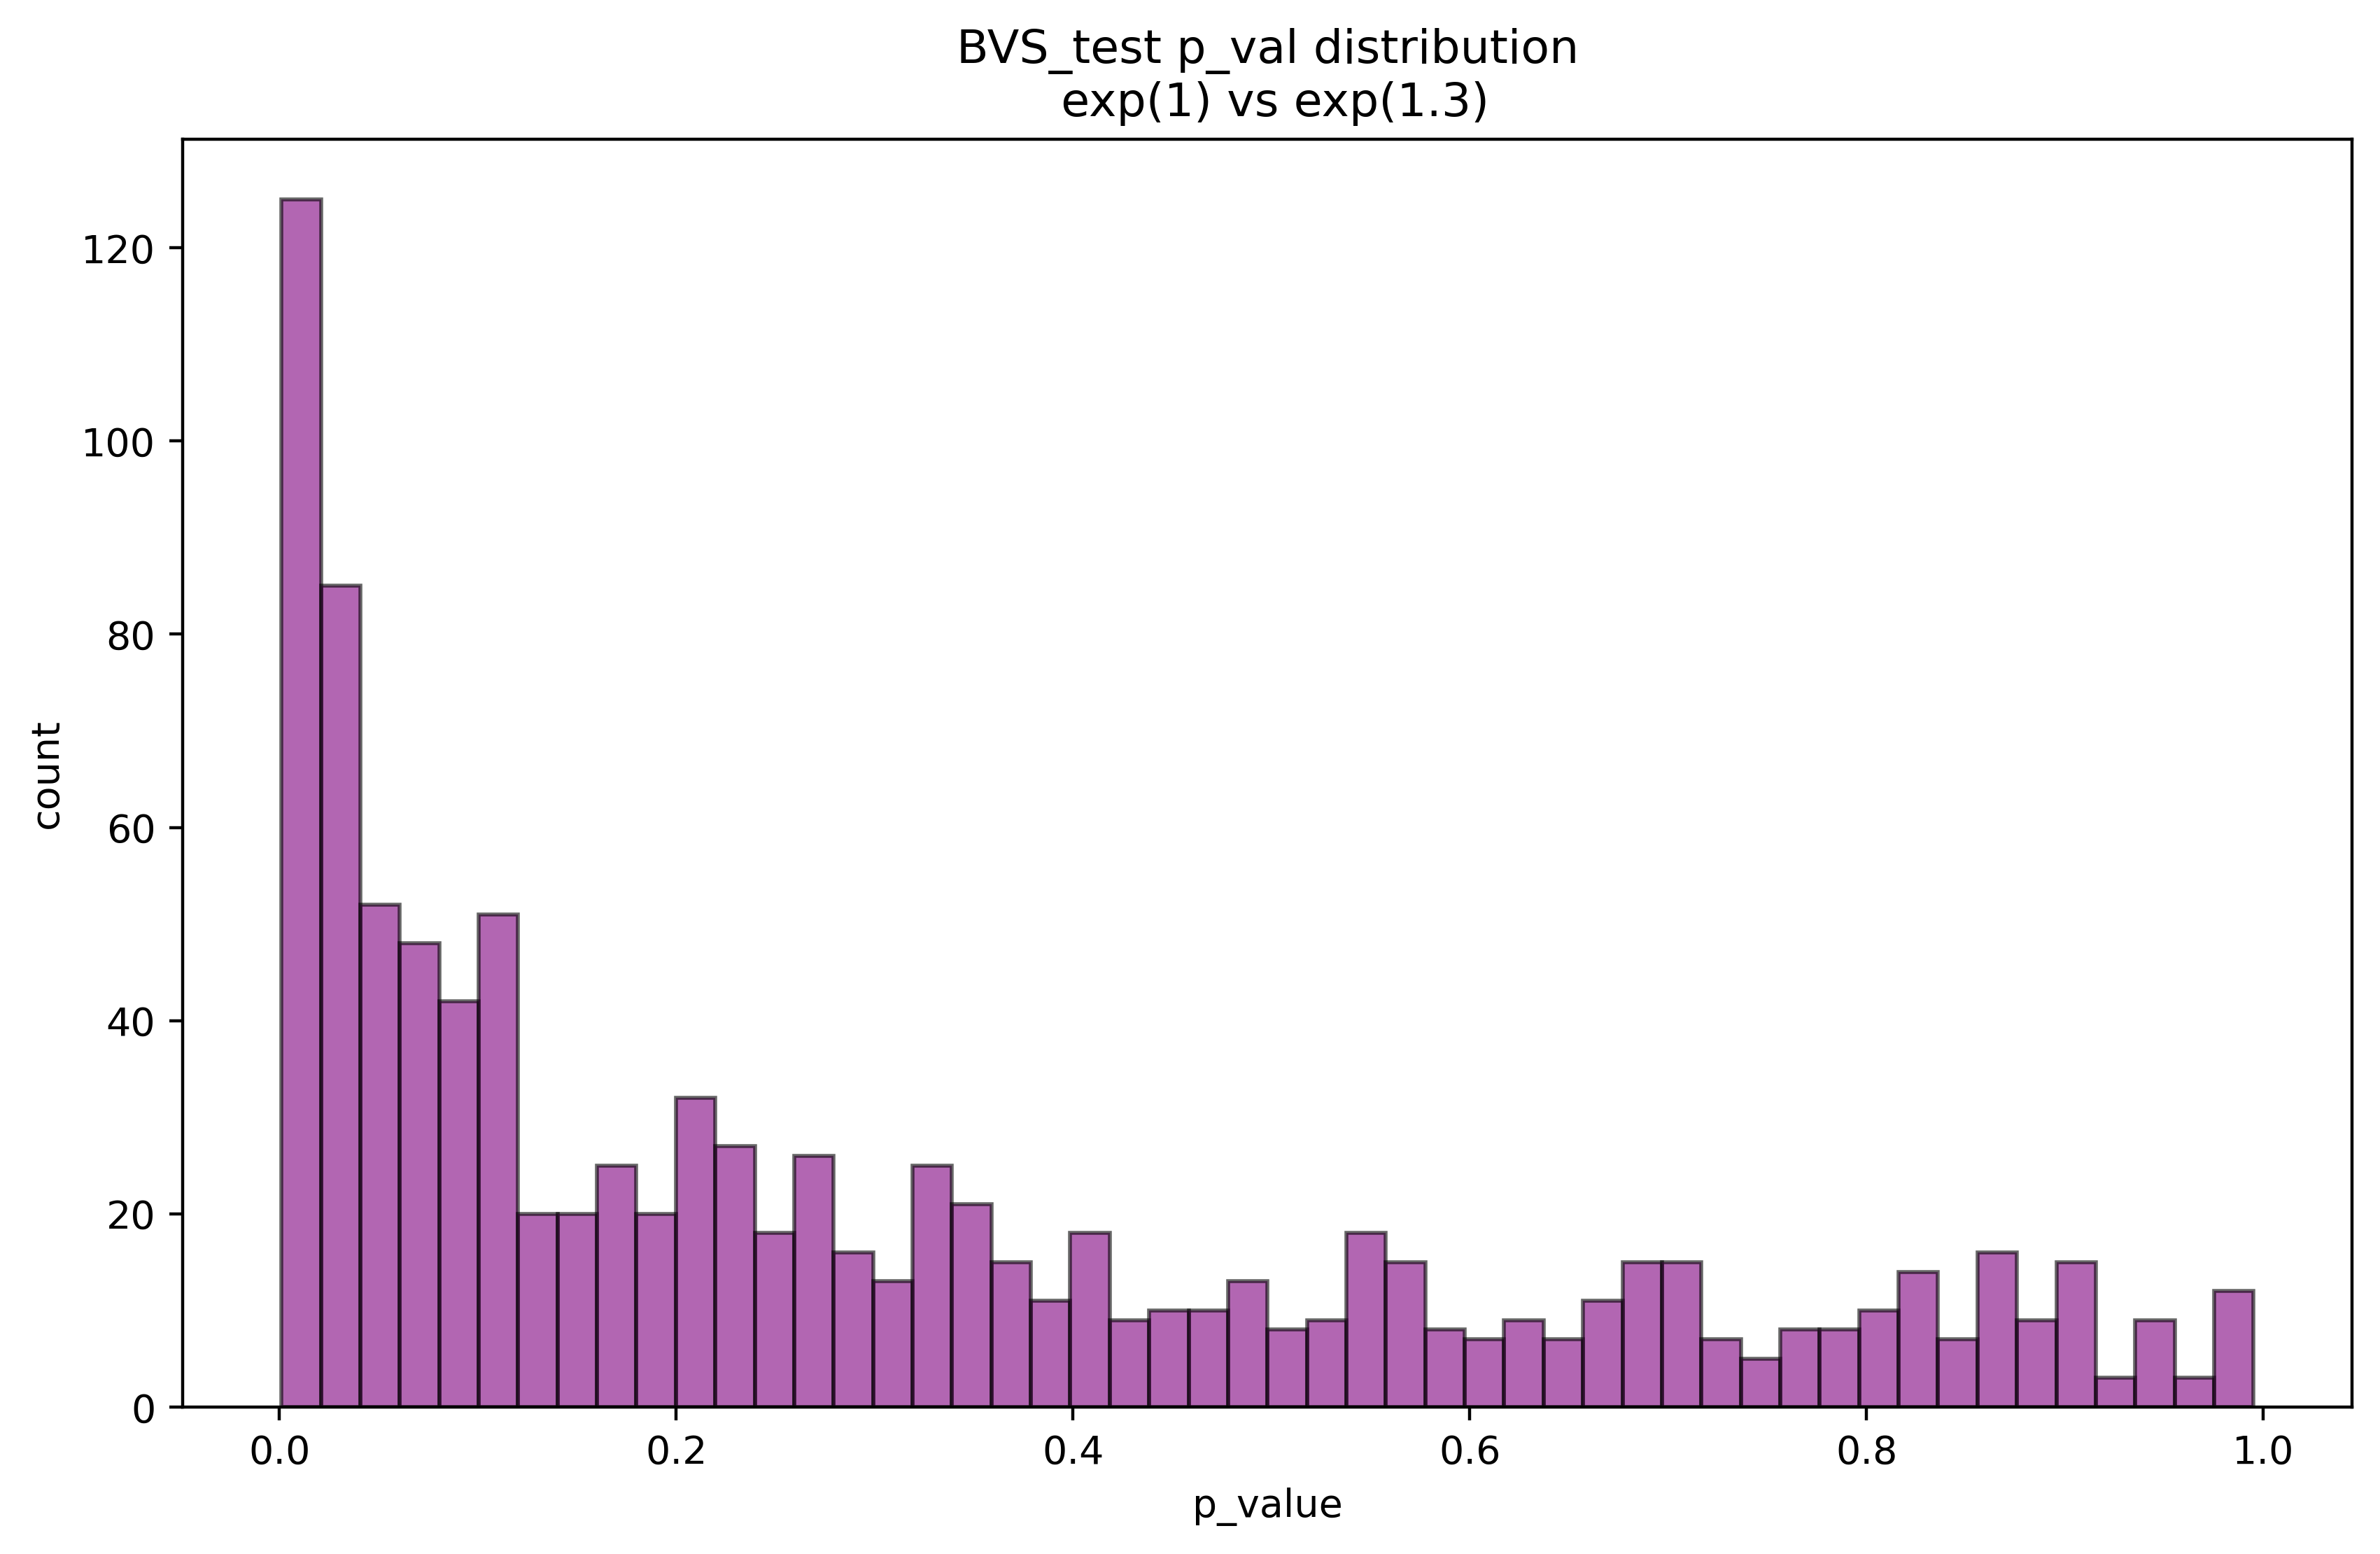

In [15]:
plt.figure(figsize=(10,6), dpi=400)
plt.hist(p_val,color='purple', alpha=0.6, edgecolor='black', bins=50);
plt.title('BVS_test p_val distribution\n exp(1) vs exp(1.3)')
plt.xlabel('p_value')
plt.ylabel('count')
plt.show()

Распределение смещено влево, значит распределения неоднороны

# Задача 3

Генерируйте выборки объема 𝑛 = 50 из 𝒩 (0, 1) (первую) и 𝒩 (0, 1) (вторую). Проверьте их однородность критерием Колмогорова–Смирнова. Теперь то же для выборок из 𝒩 (0, 1) и 𝒩 (0, 1.5). Теперь то же для выборок из exp(1) (первую) и exp(1.3) (вторую).

In [16]:
def KS(sample1, sample2): 
    p_value = st.ks_2samp(sample1, sample2).pvalue

    if p_value < alpha: 
        string = H1 
    else: 
        string = H0
    print('p_value:', p_value)
    print(string)

1) N(0,1), N(0,1)

In [17]:
samples[1] = np.random.normal(0,1, size=N)
samples[2] = np.random.normal(0,1, size=N)
KS(samples[1], samples[2])

p_value: 0.9667464356809096
Не можем отвергнуть H0, выборки однородные


2) 𝒩 (0, 1) и 𝒩 (0, 1.5)

In [18]:
samples[1] = np.random.normal(0,1, size=N)
samples[2] = np.random.normal(0,1.5, size=N)
KS(samples[1], samples[2])

p_value: 0.11238524845512393
Не можем отвергнуть H0, выборки однородные


3) exp(1) и exp(1.3)

In [19]:
samples[1] = np.random.exponential(scale=1, size=N)
samples[2] = np.random.exponential(scale=1.3, size=N)

MW(samples[1], samples[2])

p_value: 0.002999497126997576
Отвергаем H0, выборки неоднородные


# Задача 4

Генерируйте пять выборок из 𝑅[−0.5, 0.5] объема 100. Исследуйте их на равенство средних методом Краскера–Уоллиса.

Проделайте то же для пяти выборок, где первые четыре из 𝑅[−0.5, 0.5], а пятая из 𝑅[0, 1]. 

Теперь для пяти выборок из 𝑅[−0.5 + 𝑖/10, 0.5 + 𝑖/10], 𝑖 = 1, ..., 5. 

И наконец, для пяти выборок, где первые четыре из 𝑅[−0.5, 0.5], а пятая из 𝑅[−0.5, 1.5].

In [20]:
def KU(samples): 
    p_value = st.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4]).pvalue

    if p_value < alpha: 
        string = H1 
    else: 
        string = H0
    print('p_value:', p_value)
    print(string)

1) пять выборок из 𝑅[−0.5, 0.5] объема 100

In [21]:
size = 100

In [22]:
samples = []
for i in range(5): 
    samples.append(np.random.uniform(low=-0.5, high=0.5, size=size))
KU(samples)

p_value: 0.035172727785998996
Отвергаем H0, выборки неоднородные


2) первые четыре из 𝑅[−0.5, 0.5], а пятая из 𝑅[0, 1]

In [23]:
samples = []
for i in range(4): 
    samples.append(np.random.uniform(low=-0.5, high=0.5, size=size))
    
samples.append(np.random.uniform(low=0, high=1, size=size))
KU(samples)

p_value: 1.4398362930306093e-27
Отвергаем H0, выборки неоднородные


3) для пяти выборок из 𝑅[−0.5 + 𝑖/10, 0.5 + 𝑖/10], 𝑖 = 1, ..., 5

In [24]:
samples = []
for i in range(5): 
    samples.append(np.random.uniform(low=-0.5 + (i+1)/10, high=0.5 + (i+1)/10, size=size))
    
KU(samples)

p_value: 9.57660702084051e-14
Отвергаем H0, выборки неоднородные


4) первые четыре из 𝑅[−0.5, 0.5], а пятая из 𝑅[−0.5, 1.5]

In [25]:
samples = []
for i in range(4): 
    samples.append(np.random.uniform(low=-0.5, high=0.5, size=size))
    
samples.append(np.random.uniform(low=-0.5, high=1.5, size=size))
    
KU(samples)

p_value: 6.194443214966699e-17
Отвергаем H0, выборки неоднородные


# Задача 5
В файле nzrivers.txt есть информация о длинах новозеландских рек, впадающих в Тихий океан или Тасманово море. Какие из рек в среднем короче? Посмотрите на карту и сделайте предположение почему.
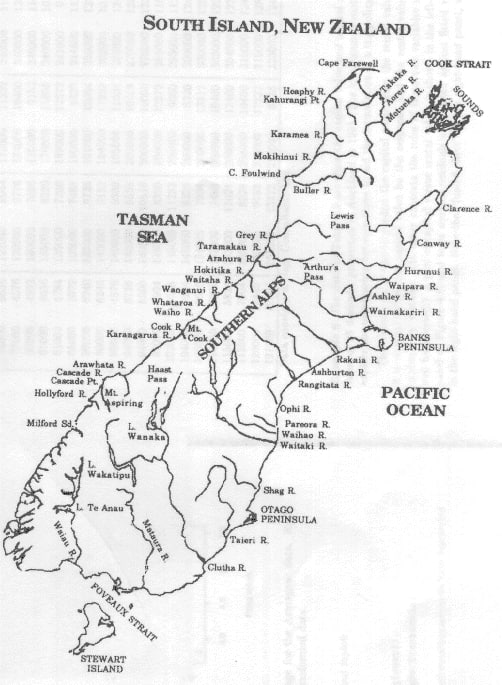

In [26]:
data = pd.read_csv("nzrivers.txt", sep='\t')
data 

,River,Length,FlowsInto
0,Clarence,209,Pacific
1,Conway,48,Pacific
2,Waiau,169,Pacific
3,Hurunui,138,Pacific
4,Waipara,64,Pacific
5,Ashley,97,Pacific
6,Waimakariri,161,Pacific
7,Selwyn,95,Pacific
8,Rakaia,145,Pacific
9,Ashburton,90,Pacific


In [27]:
pacific = np.array(data.loc[data['FlowsInto'] == 'Pacific', 'Length'])
tasman = np.array(data.loc[data['FlowsInto'] == 'Tasman', 'Length'])

print('mean pacific:', pacific.mean())
print('mean tasman:', tasman.mean())

mean pacific: 131.1578947368421
mean tasman: 67.68181818181819


$H_{1}$: реки, впадающие в Тасманово море, в среднем короче рек, впадающих в Тихий океан.

$H_{0}$: реки, впадающие в Тасманово море, не короче рек, впадающих в Тихий океан.

In [28]:
alpha = 0.05
res = ttest_ind(pacific, tasman, equal_var=False)
p_val = res.pvalue 
print('p_value:', p_val)
if p_val < alpha: 
    print('Отвергаем H0: реки, впадающие \
в Тасманово море, в среднем короче рек, впадающих в Тихий океан.')
else: 
    print('Не можем отвергнуть нулевую гипотезу: \
реки, впадающие в Тасманово море, не короче рек, впадающих в Тихий океан.')
    

p_value: 0.0033582208271584106
Отвергаем H0: реки, впадающие в Тасманово море, в среднем короче рек, впадающих в Тихий океан.


Мы отвергли нулевую гипотезу. Из рисунка видно, что пики гор Альп смещены к Тасманову морю, поэтому вода преодолевает меньший путь до него, чем до Тихого океана.

# Задача 7

В файле poison.txt приведены результаты о длительности жизни животных после принятия одного из нескольких ядов и одного из нескольких препаратов. Можем ли мы утверждать, что 
* а) яды одинаково эффективны 
* б) препараты одинаково эффективны 
* в) каждый из препаратов одинаково работает против любого из ядов. 

Данные считать близкими к нормальным из физических соображений.

In [29]:
data = pd.read_csv('poison.txt', sep='\t')
data.head()

,Poison,Treatment,Time
0,1,1,0.31
1,1,1,0.45
2,1,1,0.46
3,1,1,0.43
4,1,2,0.82


In [30]:
model = ols('Time ~ C(Poison) + C(Treatment) + C(Poison):C(Treatment)', data=data).fit()
p_values = sm.stats.anova_lm(model)['PR(>F)']
p_values

C(Poison)                 3.331440e-07
C(Treatment)              3.777331e-06
C(Poison):C(Treatment)    1.122506e-01
Residual                           NaN
Name: PR(>F), dtype: float64

In [31]:
H0 = 'Не можем отвергнуть нулевую гипотезу'
H1 = 'Отвергаем нулевую гипотезу'

a) 

$H_{0}$: яды одинаково эффективны

$H_{1}$: яды не одинаково эффективны

In [32]:
def get_pval(factor, alpha): 
    print(factor)
    pval = p_values[factor]
    print('p_value:', pval)
    if pval < alpha: 
        print(H1)
    else: 
        print(H0)

In [33]:
get_pval('C(Poison)', 0.05)

C(Poison)
p_value: 3.3314399615705046e-07
Отвергаем нулевую гипотезу


б)  
$H_{0}$: препараты одинаково эффективны

$H_{1}$: препараты не одинаково эффективны

In [34]:
get_pval('C(Treatment)', 0.05)

C(Treatment)
p_value: 3.777330575920703e-06
Отвергаем нулевую гипотезу


в) 

$H_{0}$: каждый из препаратов одинаково работает против любого из ядов

$H_{1}$: не каждый из препаратов одинаково работает против любого из ядов

In [35]:
get_pval('C(Poison):C(Treatment)', 0.05)

C(Poison):C(Treatment)
p_value: 0.11225060831141215
Не можем отвергнуть нулевую гипотезу


# Задача 6
В файле iris.txt приведены показатели трех видов растений. Можем ли мы утверждать, что у всех видов 

* а) одинаковые многомерные распределения 

* б) одинаковые средние. Сравнить виды попарно.

In [36]:
data = pd.read_csv('iris.csv.txt')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


а) У всех видов одинаковые многомерные распределения

Подход MMD. Этот подход основан на MMD - maximal mean discrepancy.

In [37]:
setosa = np.array(data.loc[data['species'] == 'setosa', data.columns.drop('species')])
versicolor = np.array(data.loc[data['species'] == 'versicolor', data.columns.drop('species')])
virginica = np.array(data.loc[data['species'] == 'virginica', data.columns.drop('species')])
samples = [setosa, versicolor, virginica]

In [38]:
stat, pvalue = KSample(indep_test="Hsic").test(*samples)
print('p_value:', pvalue)
if pvalue < alpha: 
    print('Отвергаем гипотезу (a): у цветков разные многомерные распределения')
else:
    print('Не можем отвергнуть гипотезу (a): у цветков одинаковые многомерные распределения')

p_value: 9.28190315716177e-27
Отвергаем гипотезу (a): у цветков разные многомерные распределения


б) У всех видов одинаковые средние. Сравнить виды попарно.

In [39]:
features = data.columns.drop('species')
species = data['species'].unique()

In [40]:
for i in range(len(species)): 
    for j in range(i+1, len(species)):
        for feature in features: 
            first = data.loc[data['species'] == species[i]][feature]
            second = data.loc[data['species'] == species[j]][feature]
            
            pval = ttest_ind(first, second, equal_var=False).pvalue
            
            print('feature:', feature)
            print('mean_first:', first.mean())
            print('mean_second:', second.mean())
            print('p_value:', pval)
            if pval < alpha: 
                print(f'Отвергаем H_0: у видов {species[i]} и {species[j]} \
разные средние значения признака {feature}')
            else: 
                print(f'Не можем отвергнуть H_0: у видов {species[i]} и {species[j]} \
                близкие средние значения признака {feature}')
            print('_'*50)

feature: sepal_length
mean_first: 5.005999999999999
mean_second: 5.936
p_value: 3.746742613983842e-17
Отвергаем H_0: у видов setosa и versicolor разные средние значения признака sepal_length
__________________________________________________
feature: sepal_width
mean_first: 3.4180000000000006
mean_second: 2.7700000000000005
p_value: 5.879601468409086e-15
Отвергаем H_0: у видов setosa и versicolor разные средние значения признака sepal_width
__________________________________________________
feature: petal_length
mean_first: 1.464
mean_second: 4.26
p_value: 1.057210030060334e-45
Отвергаем H_0: у видов setosa и versicolor разные средние значения признака petal_length
__________________________________________________
feature: petal_width
mean_first: 0.2439999999999999
mean_second: 1.3259999999999998
p_value: 1.53779680512802e-47
Отвергаем H_0: у видов setosa и versicolor разные средние значения признака petal_width
__________________________________________________
feature: sepal_length
